In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars_data = pd.read_csv('cars_sampled.csv')
cars_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [3]:
cars = cars_data.copy()

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [6]:
#Remove useless columns
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis =1)

In [8]:
cars.drop_duplicates(keep = 'first', inplace =True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


In [9]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [45]:
#playing with year of registration
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count

yearOfRegistration
1951      3
1953      1
1954      1
1955      5
1956      2
       ... 
2014    597
2015    354
2016    901
2017    976
2018    389
Name: count, Length: 67, dtype: int64

In [13]:
sum(cars['yearOfRegistration']>2024)
#cant predict future

24

In [35]:
sum(cars['yearOfRegistration']<1950)
#useless cars working range 1950 ,2024


38

<Axes: xlabel='yearOfRegistration', ylabel='price'>

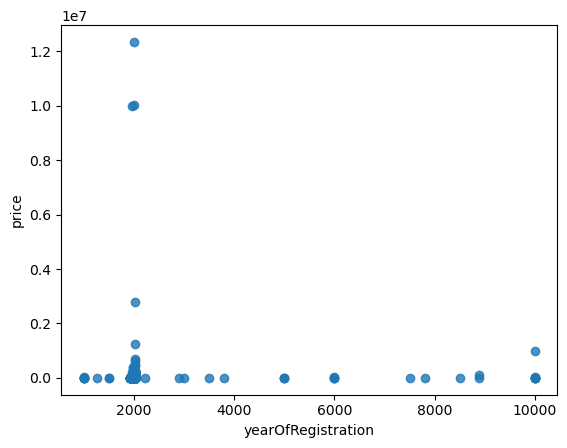

In [17]:
sns.regplot(x = 'yearOfRegistration', y='price', scatter = True,
          fit_reg = False, data = cars)

In [18]:
price_count = cars['price'].value_counts().sort_index()
price_count

price
0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: count, Length: 2393, dtype: int64

C:\Users\2XIN\AppData\Local\Temp\ipykernel_10188\1579481767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])
C:\Users\2XIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

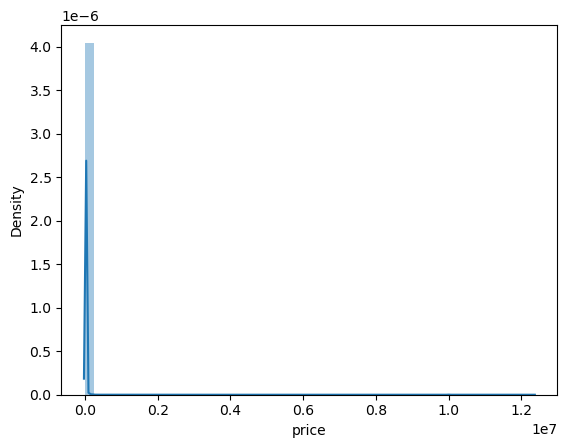

In [19]:
sns.distplot(cars['price'])


In [44]:
cars['price'].describe()

count    42772.000
mean      6135.107
std       7946.682
min        100.000
25%       1450.000
50%       3499.000
75%       7900.000
max     149000.000
Name: price, dtype: float64

<Axes: ylabel='price'>

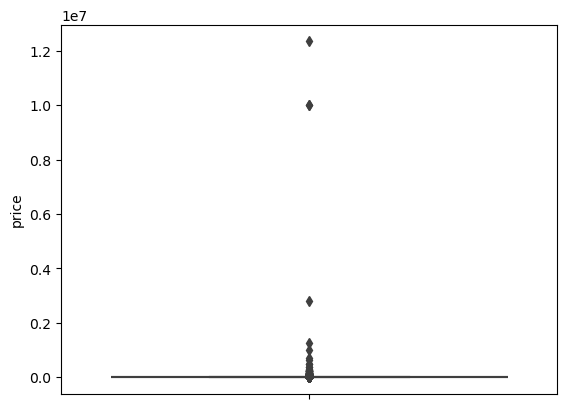

In [21]:
sns.boxplot(y = cars['price'])

In [23]:
sum(cars['price']>150000)
#useless

34

In [36]:
sum(cars['price']<100)
#useless working range 100,150000

1748

In [25]:
power_count = cars['powerPS'].value_counts().sort_index()
power_count

powerPS
0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: count, Length: 460, dtype: int64

C:\Users\2XIN\AppData\Local\Temp\ipykernel_10188\1963005702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['powerPS'])
C:\Users\2XIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='powerPS', ylabel='Density'>

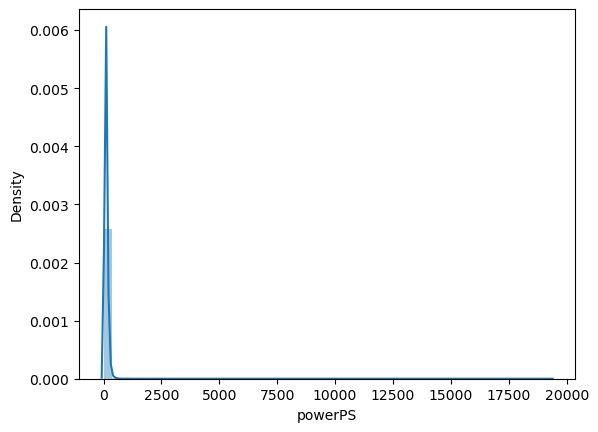

In [26]:
sns.distplot(cars['powerPS'])

In [43]:
cars['powerPS'].describe()

count   42772.000
mean      126.050
std        60.530
min        10.000
25%        80.000
50%       116.000
75%       150.000
max       500.000
Name: powerPS, dtype: float64

<Axes: ylabel='powerPS'>

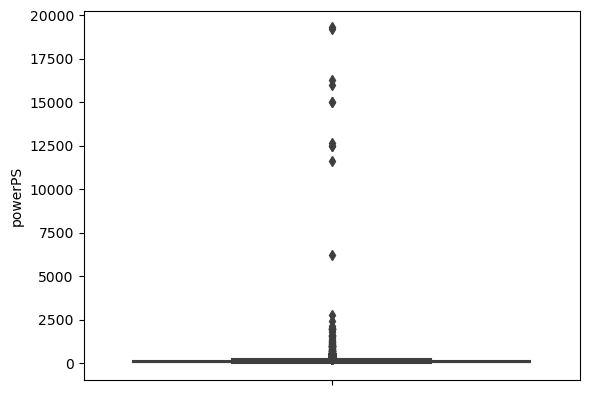

In [28]:
sns.boxplot(y = cars['powerPS'])

<Axes: xlabel='powerPS', ylabel='price'>

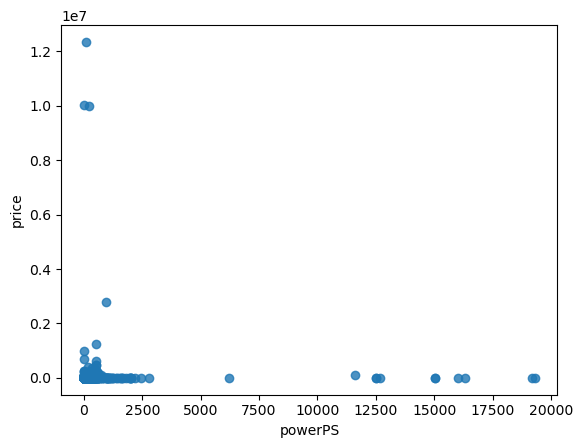

In [31]:
sns.regplot(x = 'powerPS', y='price', scatter = True,
          fit_reg = False, data = cars)

In [33]:
sum(cars['powerPS']>500)

115

In [37]:
sum(cars['powerPS']<10)
#working range = 10,500

5565

# SET THE WORKING RANGE

In [42]:
cars = cars[
           (cars.yearOfRegistration <= 2024)
          & (cars.yearOfRegistration >= 1950)
          & (cars.price >= 100)
          & (cars.price <=150000)
          & (cars.powerPS >= 10)
          & (cars.powerPS <=500)]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42772 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               42772 non-null  object
 1   offerType            42772 non-null  object
 2   price                42772 non-null  int64 
 3   abtest               42772 non-null  object
 4   vehicleType          39896 non-null  object
 5   yearOfRegistration   42772 non-null  int64 
 6   gearbox              41978 non-null  object
 7   powerPS              42772 non-null  int64 
 8   model                41089 non-null  object
 9   kilometer            42772 non-null  int64 
 10  monthOfRegistration  42772 non-null  int64 
 11  fuelType             40175 non-null  object
 12  brand                42772 non-null  object
 13  notRepairedDamage    36495 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [48]:
cars['monthOfRegistration']/=12

In [49]:
cars.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no


In [59]:
cars['Age'] = (2024 - cars['yearOfRegistration'] + cars['monthOfRegistration'])
cars['Age'] = round(cars['Age'] , 2)
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,21.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,19.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,21.920
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,19.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,16.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,20.670
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,26.750
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,25.670
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,23.250


In [60]:
cars = cars.drop(columns = ['yearOfRegistration', 'monthOfRegistration'],axis=1)
cars

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,21.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,19.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,21.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,19.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,16.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,manual,231,x_reihe,150000,petrol,bmw,no,20.670
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,26.750
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,25.670
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,23.250


C:\Users\2XIN\AppData\Local\Temp\ipykernel_10188\2270840843.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['Age'])
C:\Users\2XIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

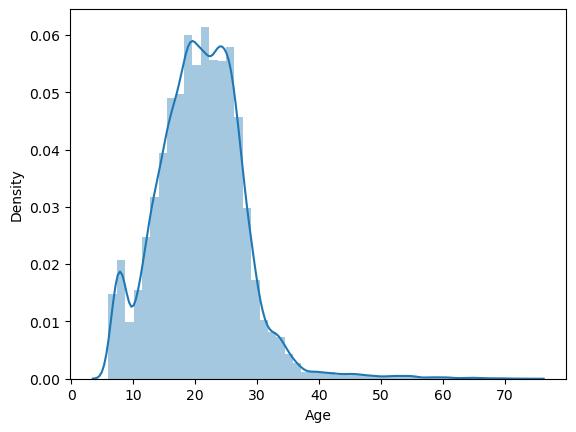

In [62]:
sns.distplot(cars['Age'])


<Axes: ylabel='Age'>

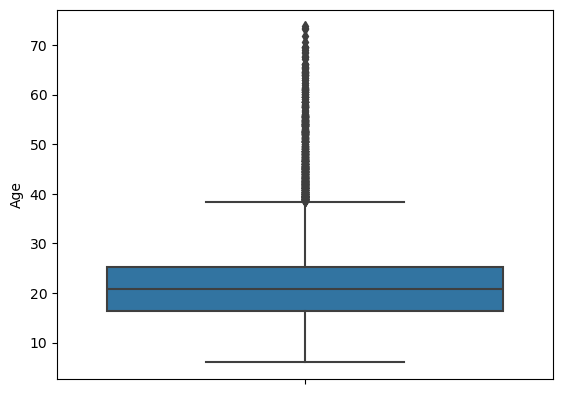

In [63]:
sns.boxplot(y = cars['Age'])

C:\Users\2XIN\AppData\Local\Temp\ipykernel_10188\3229821580.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])
C:\Users\2XIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

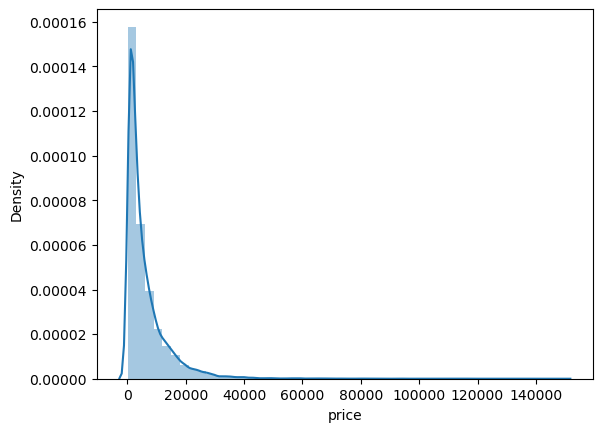

In [64]:
sns.distplot(cars['price'])

<Axes: ylabel='price'>

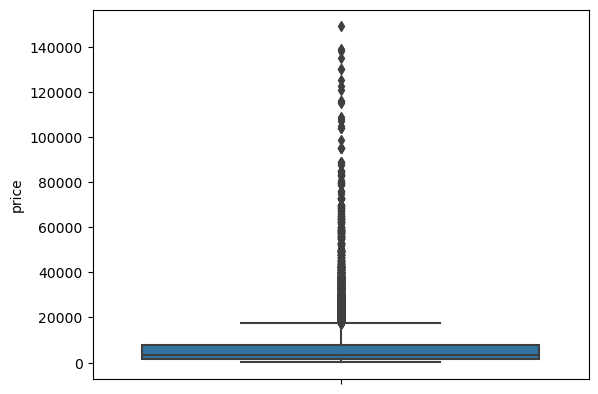

In [65]:
sns.boxplot(y = cars['price'])

C:\Users\2XIN\AppData\Local\Temp\ipykernel_10188\1963005702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['powerPS'])
C:\Users\2XIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='powerPS', ylabel='Density'>

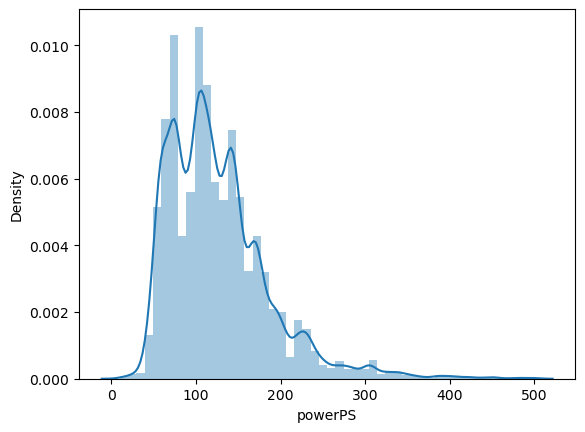

In [66]:
sns.distplot(cars['powerPS'])

<Axes: ylabel='powerPS'>

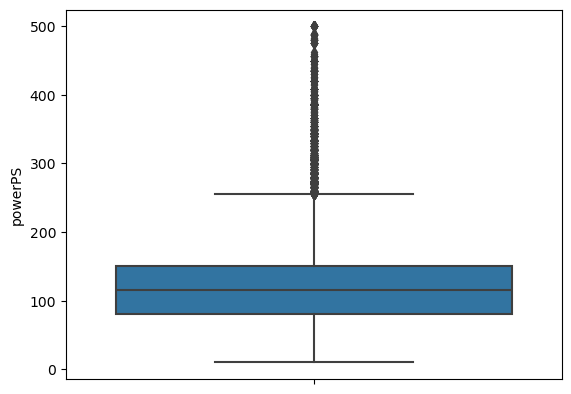

In [67]:
sns.boxplot(y = cars['powerPS'])

<Axes: xlabel='Age', ylabel='price'>

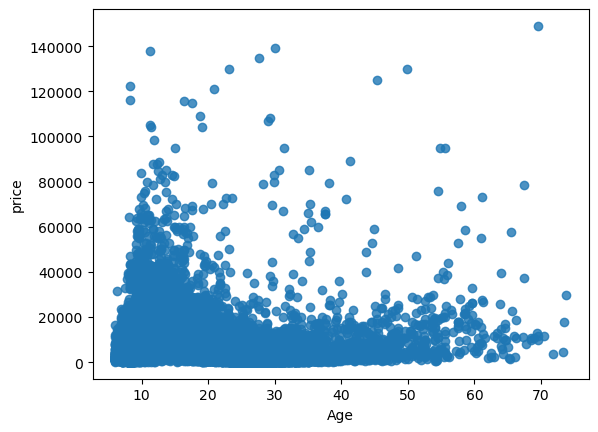

In [68]:
sns.regplot(x = 'Age', y='price', scatter = True, fit_reg=  False, data = cars)

<Axes: xlabel='powerPS', ylabel='price'>

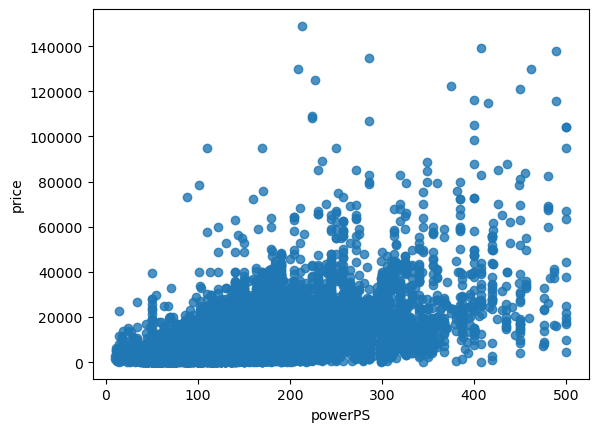

In [69]:
sns.regplot(x = 'powerPS', y='price', scatter = True, fit_reg=  False, data = cars)

In [70]:
cars['seller'].value_counts()

seller
private       42771
commercial        1
Name: count, dtype: int64

In [72]:
pd.crosstab(cars['seller'], columns= 'count', normalize = True)
#commercial useles will drop in future

col_0,count
seller,
commercial,0.000
private,1.000


In [74]:
cars['offerType'].value_counts()
#all same therefore useless

offerType
offer    42772
Name: count, dtype: int64

In [75]:
cars['abtest'].value_counts()


abtest
test       22128
control    20644
Name: count, dtype: int64

In [76]:
pd.crosstab(cars['abtest'], columns= 'count', normalize = True)

col_0,count
abtest,
control,0.483
test,0.517


<Axes: xlabel='abtest', ylabel='count'>

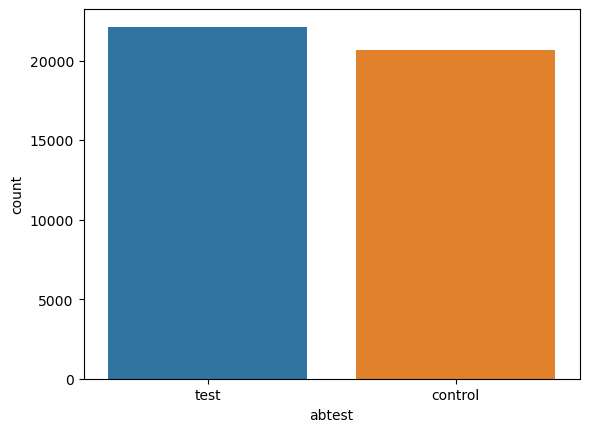

In [77]:
sns.countplot( x = 'abtest' , data = cars)

<Axes: xlabel='abtest', ylabel='price'>

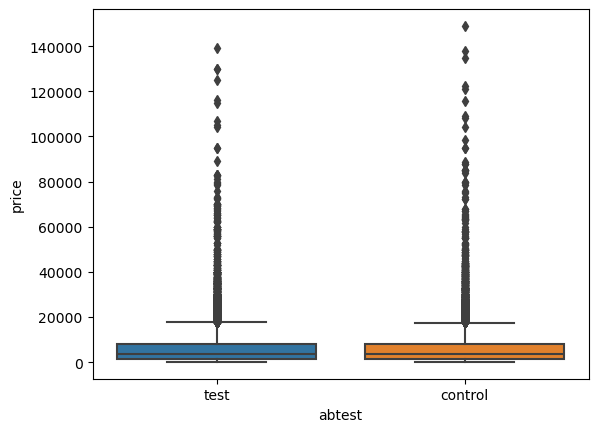

In [80]:
sns.boxplot(x = 'abtest', y= 'price', data = cars)
#both parameters have more or less same effect so insignificant

In [81]:
cars['vehicleType'].value_counts()

vehicleType
limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: count, dtype: int64

In [82]:
pd.crosstab(cars['vehicleType'],columns = 'count',normalize = True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<Axes: xlabel='vehicleType', ylabel='count'>

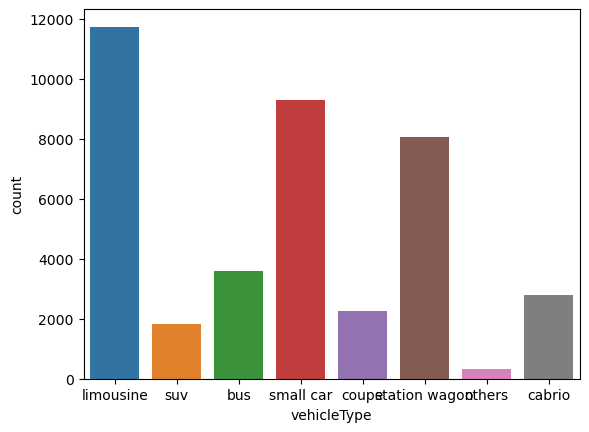

In [83]:
sns.countplot( x = 'vehicleType' , data = cars)

<Axes: xlabel='vehicleType', ylabel='price'>

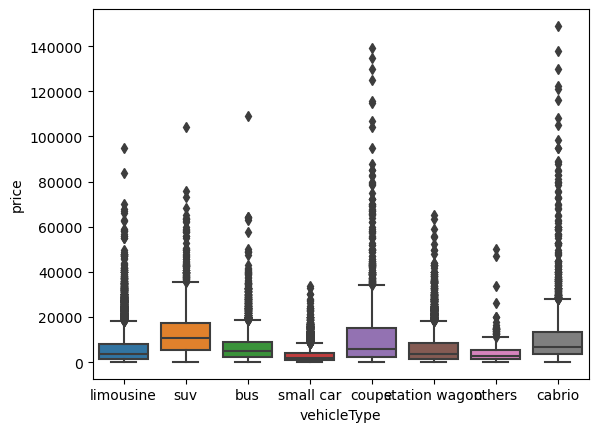

In [92]:
sns.boxplot( x = 'vehicleType' ,y='price' ,  data = cars)
#usefull

In [93]:
cars['gearbox'].value_counts()

gearbox
manual       32582
automatic     9396
Name: count, dtype: int64

In [87]:
pd.crosstab(cars['gearbox'],columns = 'count',normalize = True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<Axes: xlabel='gearbox', ylabel='count'>

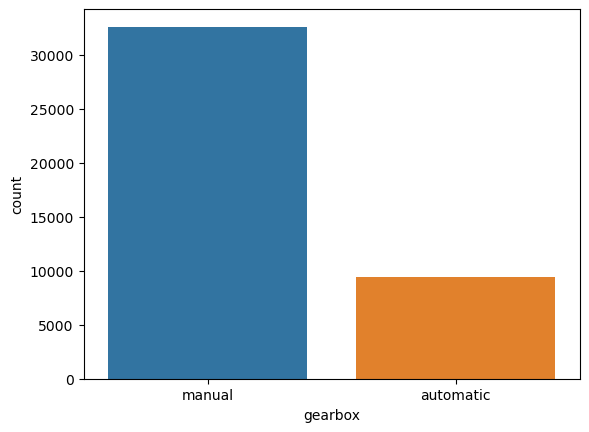

In [88]:
sns.countplot( x = 'gearbox' , data = cars)

<Axes: xlabel='gearbox', ylabel='price'>

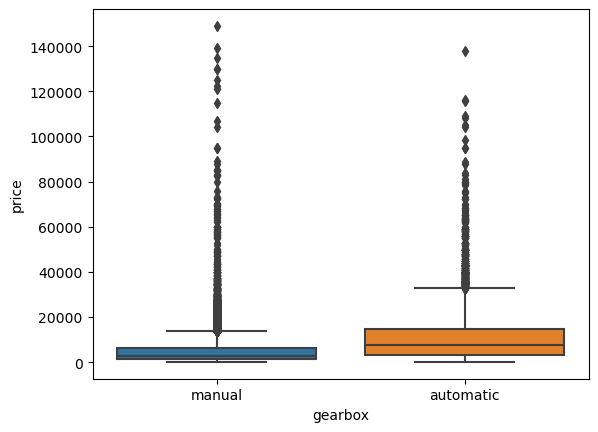

In [91]:
sns.boxplot( x = 'gearbox' ,y='price' ,  data = cars)
#usefull

In [90]:
cars['model'].value_counts()

model
golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: count, Length: 247, dtype: int64

In [94]:
pd.crosstab(cars['model'],columns = 'count',normalize = True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<Axes: xlabel='model', ylabel='count'>

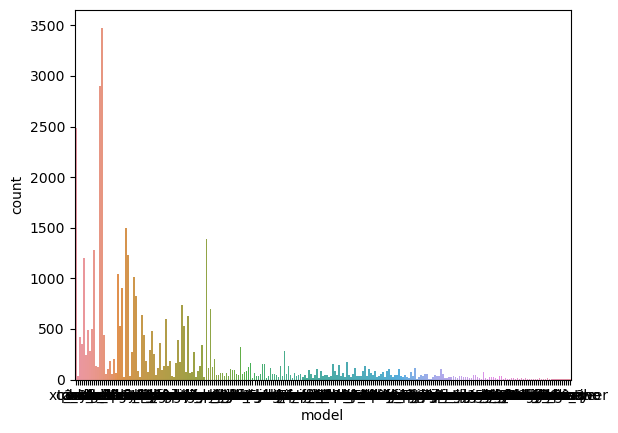

In [97]:
sns.countplot( x = 'model' , data = cars)

<Axes: xlabel='model', ylabel='price'>

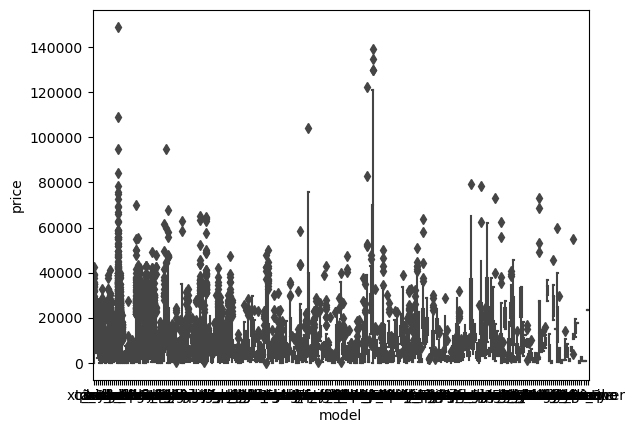

In [98]:
sns.boxplot( x = 'model' ,y='price' ,  data = cars)

In [99]:
cars['kilometer'].value_counts().sort_index()

kilometer
5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: count, dtype: int64

<Axes: xlabel='kilometer', ylabel='price'>

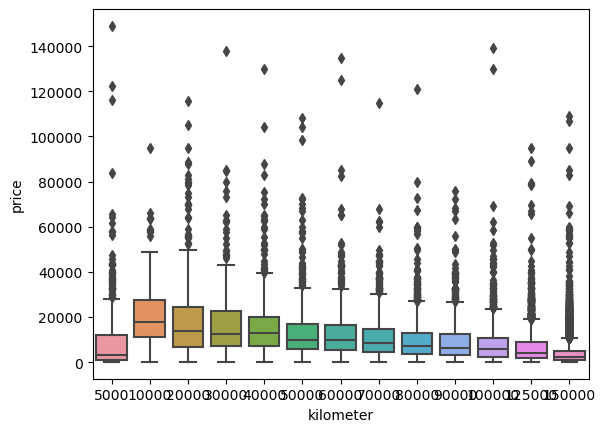

In [101]:
sns.boxplot( x = 'kilometer' ,y='price' ,  data = cars)
#usefull

In [103]:
cars['fuelType'].value_counts()

fuelType
petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: count, dtype: int64

<Axes: xlabel='fuelType', ylabel='count'>

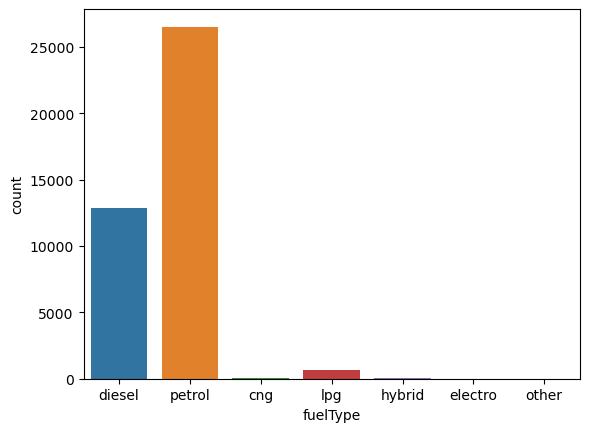

In [104]:
sns.countplot( x = 'fuelType' , data = cars)

<Axes: xlabel='fuelType', ylabel='price'>

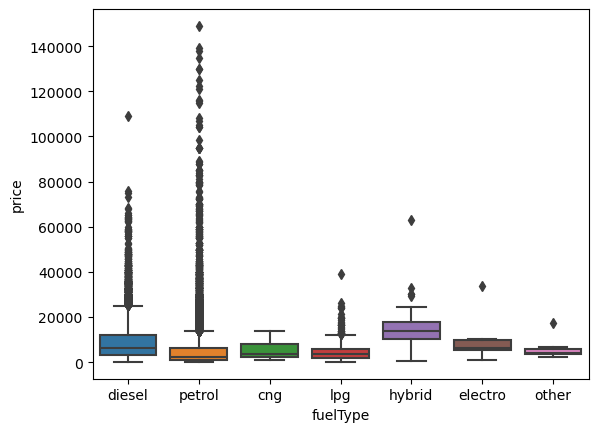

In [106]:
sns.boxplot( x = 'fuelType' ,y='price' ,  data = cars)
#usefull

In [107]:
cars['brand'].value_counts()

brand
volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

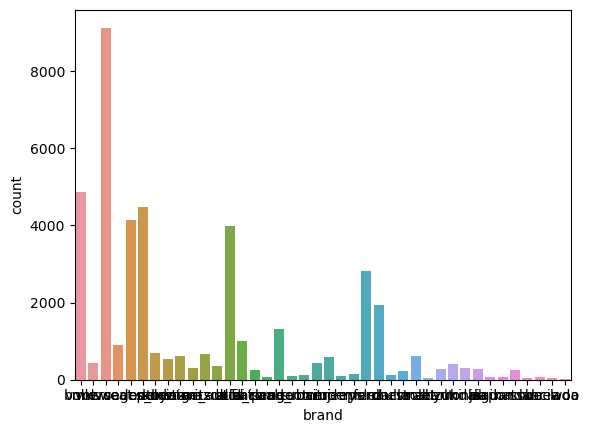

In [108]:
sns.countplot( x = 'brand' , data = cars)

<Axes: xlabel='brand', ylabel='price'>

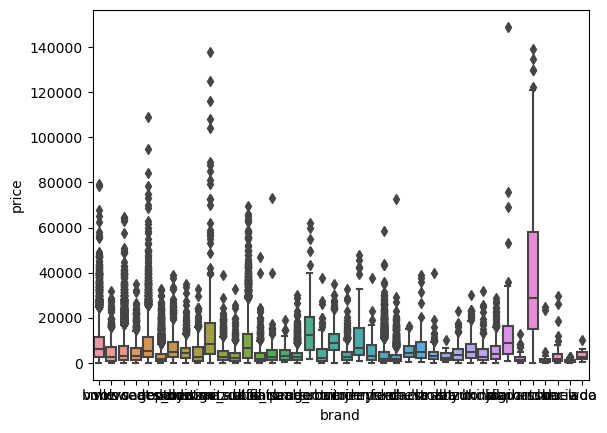

In [109]:
sns.boxplot( x = 'brand' ,y='price' ,  data = cars)

In [110]:
cars['notRepairedDamage'].value_counts()

notRepairedDamage
no     32507
yes     3988
Name: count, dtype: int64

<Axes: xlabel='notRepairedDamage', ylabel='count'>

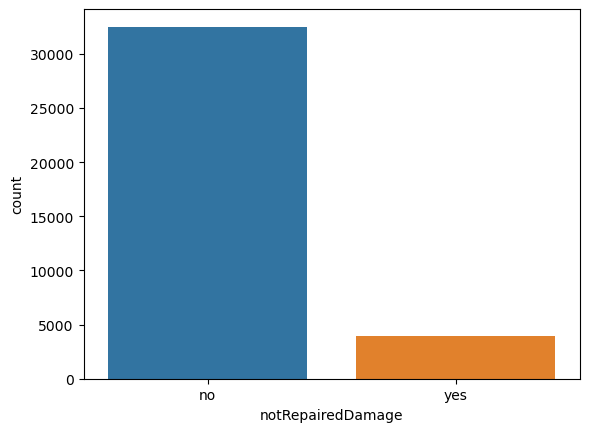

In [111]:
sns.countplot( x = 'notRepairedDamage' , data = cars)

<Axes: xlabel='notRepairedDamage', ylabel='price'>

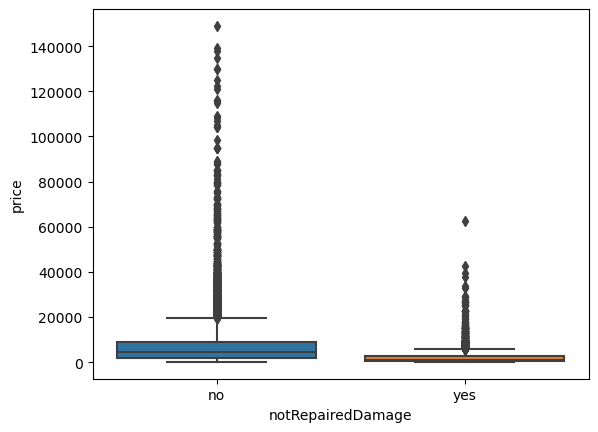

In [113]:
sns.boxplot( x = 'notRepairedDamage' ,y='price' ,  data = cars)
#usefull

In [117]:
col=['seller', 'offerType', 'abtest']
cars = cars.drop(columns = col, axis =1)
cars_copy = cars.copy()


KeyError: "['seller', 'offerType', 'abtest'] not found in axis"

In [118]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              42772 non-null  int64  
 1   vehicleType        39896 non-null  object 
 2   gearbox            41978 non-null  object 
 3   powerPS            42772 non-null  int64  
 4   model              41089 non-null  object 
 5   kilometer          42772 non-null  int64  
 6   fuelType           40175 non-null  object 
 7   brand              42772 non-null  object 
 8   notRepairedDamage  36495 non-null  object 
 9   Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 3.6+ MB


In [120]:
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
round(correlation, 3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [121]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [122]:
## used the numerical variable and found their corelation with price

# omit miss values

In [124]:
cars_omit = cars.dropna(axis = 0)

In [125]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              42772 non-null  int64  
 1   vehicleType        39896 non-null  object 
 2   gearbox            41978 non-null  object 
 3   powerPS            42772 non-null  int64  
 4   model              41089 non-null  object 
 5   kilometer          42772 non-null  int64  
 6   fuelType           40175 non-null  object 
 7   brand              42772 non-null  object 
 8   notRepairedDamage  36495 non-null  object 
 9   Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 3.6+ MB


In [126]:
cars_omit = pd.get_dummies(cars_omit, drop_first = True)

In [128]:
cars_omit

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,19.500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,4500,86,60000,19.000,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,18750,185,150000,16.920,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,988,90,150000,29.170,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,1399,136,150000,27.920,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,10900,231,150000,20.670,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49992,790,82,150000,26.750,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49993,830,60,125000,25.670,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
49995,2290,101,150000,23.250,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [131]:
x1 = cars_omit.drop(['price'], axis = 1, inplace = False)
x1

,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,163,150000,19.500,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,86,60000,19.000,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,185,150000,16.920,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
5,90,150000,29.170,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,136,150000,27.920,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,231,150000,20.670,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49992,82,150000,26.750,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49993,60,125000,25.670,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
49995,101,150000,23.250,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [134]:
y1 = cars_omit['price']
y1

1        13299
3         4500
4        18750
5          988
7         1399
         ...  
49991    10900
49992      790
49993      830
49995     2290
50000     1100
Name: price, Length: 32884, dtype: int64

In [137]:
prices = pd.DataFrame({"1.Before": y1, "2.After": np.log(y1)})
prices

,1.Before,2.After
1,13299,9.495
3,4500,8.412
4,18750,9.839
5,988,6.896
7,1399,7.244
...,...,...
49991,10900,9.297
49992,790,6.672
49993,830,6.721
49995,2290,7.736


array([[<Axes: title={'center': '1.Before'}>,
        <Axes: title={'center': '2.After'}>]], dtype=object)

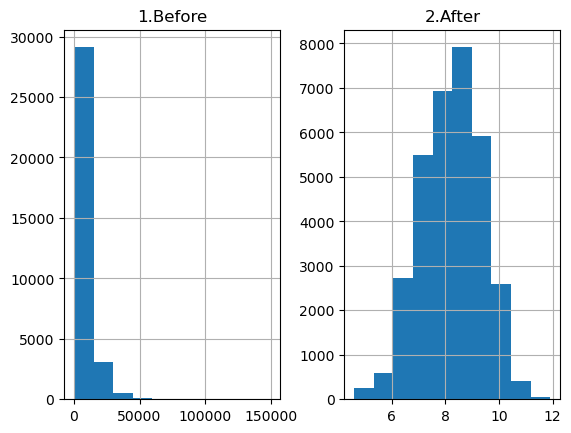

In [138]:
prices.hist()

In [139]:
#this better so convert

In [140]:
y1 = np.log(y1)

In [143]:
X_train,X_test , y_train, y_test = train_test_split(x1 , y1 , test_size = 0.3 , random_state = 33)
print(X_train.shape, X_test.shape , y_train.shape , y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [144]:
base_pred = np.mean(y_test)
base_pred

8.243248606993598

In [147]:
base_pred = np.repeat(base_pred, len(y_test))

In [148]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
base_root_mean_square_error

1.132469008831307

In [149]:
#future model should give less error than this

In [150]:
lgr = LinearRegression(fit_intercept = True)


In [151]:
model_lin1 = lgr.fit(X_train, y_train)

In [152]:
cars_pred_lin1 = lgr.predict(X_test)

In [154]:
lin_mse1 = mean_squared_error(y_test, cars_pred_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

0.5350190433893351

In [155]:
# calculate r square

In [156]:
r2_lin_test1 = model_lin1.score(X_test, y_test)
r2_lin_train1 = model_lin1.score(X_train, y_train)
print(r2_lin_test1,r2_lin_train1)

0.7768042970461609 0.7759060932616615


<Axes: ylabel='price'>

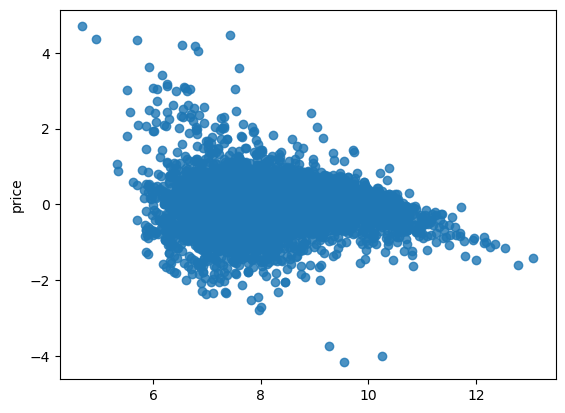

In [165]:
residuals1 = y_test-cars_pred_lin1 # diff between actual and predit
sns.regplot(x = cars_pred_lin1, y = residuals1, scatter = True, fit_reg = False, data = cars)

In [164]:
residuals1.describe()

count   9866.000
mean       0.005
std        0.535
min       -4.169
25%       -0.254
50%        0.042
75%        0.293
max        4.694
Name: price, dtype: float64

# RANDOM FOREST

In [166]:
rf = RandomForestRegressor(n_estimators=100,max_features='auto',
                           max_depth=100 , min_samples_split=10,
                           min_samples_leaf=4,random_state=1 )

In [173]:
model_rf1 = rf.fit(X_train, y_train)

C:\Users\2XIN\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [174]:
cars_pred_rf1 = rf.predict(X_test)

In [175]:
rf_mse1 = mean_squared_error(y_test, cars_pred_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
rf_rmse1

0.4173610439583431

In [176]:
#better than lin reg as error is less

In [177]:
r2_rf_test1 = model_rf1.score(X_test, y_test)
r2_rf_train1 = model_rf1.score(X_train , y_train)
print(r2_rf_test1,r2_rf_train1)

0.8641776725727035 0.9175917775202297


# imputing missing values


In [179]:
cars_imputed = cars.apply(lambda x: x.fillna(x.median()) \
                          if x.dtype == 'float' else \
                          x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [181]:
cars_imputed = pd.get_dummies(cars_imputed , drop_first = True)

In [182]:
x2 = cars_imputed.drop(['price'] , axis =1 , inplace = False)
y2 = cars_imputed['price']

In [185]:
prices = pd.DataFrame({"1.Before":y2, "2.After":np.log(y2)})
prices

,1.Before,2.After
0,4450,8.401
1,13299,9.495
2,3200,8.071
3,4500,8.412
4,18750,9.839
...,...,...
49991,10900,9.297
49992,790,6.672
49993,830,6.721
49995,2290,7.736


array([[<Axes: title={'center': '1.Before'}>,
        <Axes: title={'center': '2.After'}>]], dtype=object)

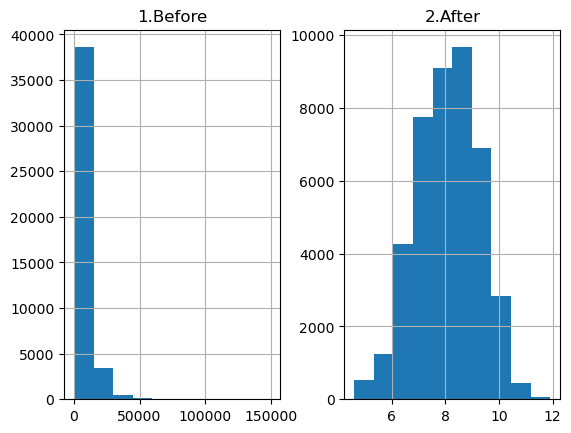

In [186]:
prices.hist()

In [187]:
y2 = np.log(y2)

In [188]:
X_train1,X_test1 , y_train1, y_test1 = train_test_split(x2 , y2 , test_size = 0.3 , random_state = 33)
print(X_train1.shape, X_test1.shape , y_train1.shape , y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [193]:
base_pred = np.mean(y_test1)
base_pred

8.089012707800075

In [194]:
base_pred = np.repeat(base_pred, len(y_test1))

In [195]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
base_root_mean_square_error_imputed


1.1672887364336588

In [196]:
lgr2 = LinearRegression(fit_intercept = True)

In [197]:
model_lin2 = lgr2.fit(X_train1, y_train1)

In [198]:
cars_pred_lin2 = lgr2.predict(X_test1)

In [199]:
lin_mse2 = mean_squared_error(y_test1, cars_pred_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

0.6302187535066737

In [201]:
#error increase

In [208]:
r2_lin_test2 = model_lin2.score(X_test1, y_test1)
r2_lin_train2 = model_lin2.score(X_train1, y_train1)
print(r2_lin_test2,r2_lin_train2)

0.7085083926682787 0.7046699092268904


In [202]:
rf2 = RandomForestRegressor(n_estimators=100,max_features='auto',
                           max_depth=100 , min_samples_split=10,
                           min_samples_leaf=4,random_state=1 )

In [203]:
model_rf2 = rf2.fit(X_train1, y_train1)

C:\Users\2XIN\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [204]:
cars_pred_rf2 = rf2.predict(X_test1)

In [205]:
rf_mse2 = mean_squared_error(y_test1, cars_pred_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
rf_rmse2

0.47339728530927777

In [206]:
#better

In [207]:
r2_rf_test2 = model_rf2.score(X_test1, y_test1)
r2_rf_train2 = model_rf2.score(X_train1 , y_train1)
print(r2_rf_test2,r2_rf_train2)

0.8355268778828326 0.900268525490615


In [211]:
print("Data from omit")
print(" R square - train - linear = %s" %r2_lin_train1)
print(" R square - test - linear = %s" %r2_lin_test1)
print(" R square - train - forest = %s" %r2_rf_train1)
print(" R square - test - forest = %s" %r2_rf_test1)
print(" RMSE BASE OMIT= %s" %base_root_mean_square_error)
print(" RMSE linear = %s" %lin_rmse1)
print(" RMSE forest = %s" %rf_rmse1)
print("\n\n")
print("Data from imputed")
print(" R square - train - linear = %s" %r2_lin_train2)
print(" R square - test - linear = %s" %r2_lin_test2)
print(" R square - train - forest = %s" %r2_rf_train2)
print(" R square - test - forest = %s" %r2_rf_test2)
print(" RMSE BASE IMPUT= %s" %base_root_mean_square_error_imputed)
print(" RMSE linear = %s" %lin_rmse2)
print(" RMSE forest = %s" %rf_rmse2)

Data from omit
 R square - train - linear = 0.7759060932616615
 R square - test - linear = 0.7768042970461609
 R square - train - forest = 0.9175917775202297
 R square - test - forest = 0.8641776725727035
 RMSE BASE OMIT= 1.132469008831307
 RMSE linear = 0.5350190433893351
 RMSE forest = 0.4173610439583431



Data from imputed
 R square - train - linear = 0.7046699092268904
 R square - test - linear = 0.7085083926682787
 R square - train - forest = 0.900268525490615
 R square - test - forest = 0.8355268778828326
 RMSE BASE IMPUT= 1.1672887364336588
 RMSE linear = 0.6302187535066737
 RMSE forest = 0.47339728530927777
